## Exploração dos dados obtidos via API Strava 😄👩‍💻🚀

##### Este notebook foi desenvolvido com o objetivo de realizar uma análise detalhada dos dados obtidos pela API Strava. A API é uma meio que permite acessar uma rica coleção de dados relacionados a atividades físicas, como o ciclismo 🚵, natação 🏊, corrida 🏃, entre outras. Os dados incluem métricas como distância percorrida, tempo da atividade, elevação, batimentos cardiacos, etc.

##### A seleção de dados para este notebook foi realizada mantendo apenas aqueles dados relevantes para as questões propostas 🎯. Além disso, um processo de limpeza foi aplicado para garantir a precisão e a qualidade das análises. O foco está em extrair *insights* relevantes que possam responder a perguntas específicas sobre padrões de atividades físicas, tendências ao longo do tempo e comportamento dos atletas 🏅.

##### Com a combinação de métodos estatísticos e visualizações gráficas, este notebook busca não apenas responder a perguntas predefinidas, mas também descobrir novas perspectivas e histórias contadas pelos dados 📊📈.

###### ✨ **Os dados a seguir foram extraídos de uma conta de um atleta amador do Strava.** ✨

##### 📚 Importando as bibliotecas

In [112]:
# Importação de bibliotecas
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import polyfit, poly1d
import plotly.express as px

# Configurações globais para visualizações
%matplotlib inline
sns.set_theme(style="darkgrid")

caminho_usuario = os.path.expanduser('~')
file = 'Desktop\\codigos\\Python\\Strava_PB_PY\\PY_PB_Strava\\data\\processed\\data.csv'
arquivo = os.path.join(caminho_usuario, file)

##### 📁 Carregamento dos dados no dataframe df

In [113]:
df = pd.read_csv(arquivo)

##### 🔍 Análise Exploratória de Dados (EDA)

##### O arquivo contém as seguintes variaveis
    
*   **name:** O nome dado à atividade pelo usuário.
*   **distance:** A distância total percorrida durante a atividade, geralmente em metros.
*   **moving_time:** O tempo total em movimento, excluindo as paradas, geralmente em segundos.
*   **elapse_time:** O tempo total decorrido desde o início até o fim da atividade, incluindo todas as paradas, geralmente em segundos.
*   **total_elevation_gain:** O ganho total de elevação durante a atividade, 0geralmente em metros.
*   **sport_type:** Um campo mais específico que detalha o tipo de esporte dentro de uma categoria de atividade.
*   **start_date_local:** A data e hora de início da atividade.
*   **achievement_count:** O número de conquistas ganhas durante a atividade.
*   **kudos_count:** O número curtidas que a atividade recebeu.
*   **comment_count:** O número de comentários feitos na atividade.
*   **photo_count:** O número de fotos associadas à atividade.
*   **average_speed:** A velocidade média durante a atividade, geralmente em metros por segundo.
*   **max_speed:** A velocidade máxima atingida durante a atividade.
*   **average_heartrate:** A frequência cardíaca média durante a atividade.
*   **max_heartrate:** A frequência cardíaca máxima alcançada durante a atividade.
*   **elev_high:** A maior elevação alcançada durante a atividade.
*   **elev_low:** A menor elevação durante a atividade.
*   **pr_count:** O número de recordes pessoais alcançados durante a atividade.

In [114]:
# Resumo estatístico das variáveis numéricas
df.describe()

,distance,total_elevation_gain,achievement_count,kudos_count,comment_count,photo_count,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.0,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,3.068340,24.554693,0.725632,1.249097,0.012635,0.0,6.288050,9.949250,131.833700,159.026479,357.183574,343.179122,0.314079
std,4.058611,38.853038,3.765335,1.595441,0.174876,0.0,4.677798,9.112929,24.609832,20.501298,254.550751,243.996197,2.378836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,73.600000,94.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,108.500000,143.250000,0.000000,0.000000,0.000000
50%,0.783300,3.700000,0.000000,1.000000,0.000000,0.0,8.173800,12.461400,135.000000,163.000000,529.349451,509.239927,0.000000
75%,5.910975,38.175000,0.000000,2.000000,0.000000,0.0,9.598500,14.895900,154.175000,177.000000,529.349451,509.239927,0.000000
max,24.075400,250.900000,75.000000,13.000000,3.000000,0.0,16.286400,46.184400,174.400000,190.000000,914.700000,811.400000,39.000000


In [115]:
# Resumo sobre o dataframe, nome das colunas, quantidade dos não nulos e o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  554 non-null    object 
 1   distance              554 non-null    float64
 2   moving_time           554 non-null    object 
 3   elapsed_time          554 non-null    object 
 4   total_elevation_gain  554 non-null    float64
 5   sport_type            554 non-null    object 
 6   start_date_local      554 non-null    object 
 7   achievement_count     554 non-null    int64  
 8   kudos_count           554 non-null    int64  
 9   comment_count         554 non-null    int64  
 10  photo_count           554 non-null    int64  
 11  average_speed         554 non-null    float64
 12  max_speed             554 non-null    float64
 13  average_heartrate     554 non-null    float64
 14  max_heartrate         554 non-null    float64
 15  elev_high             5

In [116]:
# Amostra dos dados, contendo as 5 primeiras linhas do dataframe
df.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,start_date_local,achievement_count,kudos_count,comment_count,...,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,data,duracao,end_date_local
0,Corrida da tarde,9.0222,0 days 01:01:33,0 days 01:03:02,87.7,corrida,2024-05-29 17:29:36+00:00,0,2,0,...,8.7948,14.2740,156.4,182.0,529.349451,509.239927,0,2024-05-29,0 days 01:03:02,2024-05-29 18:32:38+00:00
1,Treinamento com peso vespertino,0.0000,0 days 01:19:51,0 days 01:19:51,0.0,treino com peso,2024-05-28 17:19:39+00:00,0,0,0,...,0.0000,0.0000,94.9,127.0,0.000000,0.000000,0,2024-05-28,0 days 01:19:51,2024-05-28 18:39:30+00:00
2,Corrida ao entardecer,6.8060,0 days 00:44:02,0 days 00:44:37,37.2,corrida,2024-05-27 18:19:33+00:00,1,4,0,...,9.2736,15.1812,163.3,182.0,529.349451,509.239927,0,2024-05-27,0 days 00:44:37,2024-05-27 19:04:10+00:00
3,Treinamento com peso vespertino,0.0000,0 days 00:41:31,0 days 00:41:31,0.0,treino com peso,2024-05-27 17:17:10+00:00,0,2,0,...,0.0000,0.0000,105.2,134.0,0.000000,0.000000,0,2024-05-27,0 days 00:41:31,2024-05-27 17:58:41+00:00
4,7km endorfinada,7.0320,0 days 00:47:52,0 days 00:48:31,61.2,corrida,2024-05-24 17:20:24+00:00,0,6,0,...,8.8128,12.0348,157.8,181.0,529.349451,509.239927,0,2024-05-24,0 days 00:48:31,2024-05-24 18:08:55+00:00


##### 👀 Nota-se que não há valores em branco/nulos, os dados não são somente números, há objetos, como por exemplo nome da atividade, tipo do esporte. 
*   Percebemos que a maior quilometragem alcansada foi de 24km;
*   O maior ganho de elevação foi de 250 metros;
*   Foram alcançados no máximo 39 recordes pessoais em uma atividade;
*   O ritmo cardiaco chegou aos 190 bpm;
*   A maior duração de uma atividade foi de 3 horas 13 minutos e 26 segundos;
*   Há diversos tipos de atividades nesta base, como, corrida, treino com peso. É o que as 5 primeiras linhas dizem.

#### 📊👀 **Análise Visual dos Dados de Atividades Físicas**
Vamos explorar os dados através de gráficos interativos que respondam às seguintes perguntas:

- 📅 Quantas atividades foram feitas neste mês? ✅
- 🏃‍♀️ Qual está sendo a atividade física mais praticada neste mês? ✅
- 📅 Quantas atividades foram feitas neste ano? ✅
- 🏃‍♂️ Qual está sendo a atividade física mais praticada este ano? ✅
- 📅 Quantos dias em movimento mês a mês com a linha de média? ✅
- 📅 Quantas atividades por tipo de esporte foram feitas mês a mês? ✅
- ⏱️ Qual é o tempo em movimento mês a mês? ✅
- 🔄 Qual é o tempo em movimento mês a mês por atividade física? ✅
- 📏 Quais são as distâncias percorridas mês a mês? ✅
- ⛰️ Quais são os ganhos de elevação mês a mês? ✅


In [117]:
# Converta 'start_date_local' para datetime e extraia o mês e o ano
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['data'] = pd.to_datetime(df['data'])
df['month'] = df['start_date_local'].dt.month
df['year'] = df['start_date_local'].dt.year

In [118]:
# 📅 Quantas atividades foram feitas neste mês/ano? ✅
atividades_mes = df[
    (df['month'] == pd.Timestamp('today').month)
    &
    (df['year'] == pd.Timestamp('today').year)].shape[0]

print(f"Atividades neste mês: {atividades_mes}")

# 🏃‍♀️ Qual está sendo a atividade física mais praticada neste mês/ano? ✅
# Filtrar as atividades deste mês e ano
atividades_mes = df[
    (df['month'] == pd.Timestamp('today').month)
    &
    (df['year'] == pd.Timestamp('today').year)]

# Contagem de categorias e a escolha do maior
atividade_do_mes = atividades_mes['sport_type'].value_counts().idxmax()
print(f"Atividade mais praticada neste mês: {atividade_do_mes}")

# Contagem de atividades por tipo de esporte
contagem_atividades = atividades_mes['sport_type'].value_counts().reset_index()
contagem_atividades.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(contagem_atividades, x='Tipo de atividade', y='Quantidade de atividades', title='Atividades Físicas Mais Praticadas Neste Mês')
fig.show()

Atividades neste mês: 28
Atividade mais praticada neste mês: treino com peso


In [119]:
# 📅 Quantas atividades foram feitas neste ano?
atividades_ano = df[df['year'] == pd.Timestamp('today').year]
print(f"Atividades neste ano: {atividades_ano.shape[0]}")

# 🏃‍♂️ Qual está sendo a atividade física mais praticada este ano?
atividade_mais_praticada_ano = atividades_ano['sport_type'].value_counts()
print(f"Atividade mais praticada este ano: {atividade_mais_praticada_ano.idxmax()}")

# Contagem de atividades por tipo de esporte
contagem_atividades_ano = atividades_ano['sport_type'].value_counts().reset_index()
contagem_atividades_ano.columns = ['Tipo de atividade', 'Quantidade de atividades']

# Gráfico de barras com a contagem de atividades por tipo de esporte
fig = px.bar(contagem_atividades_ano, x='Tipo de atividade', y='Quantidade de atividades', title='Atividades Físicas Mais Praticadas Neste Ano')
fig.show()

Atividades neste ano: 137
Atividade mais praticada este ano: corrida


In [127]:
# 📅 Quantos dias em movimento mês a mês com a linha de média? ✅
# Preparar os dados
df['ano_mes'] = df['data'].dt.strftime('%m-%Y')

# Agrupar os dados e excluindo as datas duplicadas deixando apenas uma
# Renomeando as colunas
contagem_dias = df.groupby('ano_mes')['data'].nunique().reset_index()
contagem_dias.columns = ['Ano/Mês', 'Dias em movimento']

# Calculando a média
media = contagem_dias['Dias em movimento'].mean()

# Ordenando os dados
contagem_dias['Ano/Mês'] = pd.to_datetime(contagem_dias['Ano/Mês'], format='%m-%Y')
contagem_dias.sort_values(by='Ano/Mês', inplace=True)
contagem_dias['Ano/Mês'] = contagem_dias['Ano/Mês'].dt.strftime('%m-%Y')

# Plotar o gráfico
fig = px.bar(contagem_dias, x='Ano/Mês', y='Dias em movimento', title='Dias em Movimento Mês à Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} dias",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()


In [129]:
# 📅 Quantas atividades por tipo de esporte foram feitas mês a mês?
# Agrupar os dados por 'ano_mes' e 'sport_type'
atividades_por_tipo = df.groupby(['ano_mes', 'sport_type']).size().reset_index(name='Quantidade')
atividades_por_tipo.columns = ["Ano/Mês", "Tipo de esporte", "Quantidade"]

# Ordenar os dados
atividades_por_tipo['Ano/Mês'] = pd.to_datetime(atividades_por_tipo['Ano/Mês'], format='%m-%Y')
atividades_por_tipo.sort_values(by='Ano/Mês', inplace=True)
atividades_por_tipo['Ano/Mês'] = atividades_por_tipo['Ano/Mês'].dt.strftime('%m-%Y')

# Plotar o gráfico de barras
fig = px.bar(atividades_por_tipo, x='Ano/Mês', y='Quantidade', color='Tipo de esporte',
             title='Quantidade de Atividades por Tipo de Esporte Mês a Mês')

# Mostrar o gráfico
fig.show()


In [131]:
df.head()

,name,distance,moving_time,elapsed_time,total_elevation_gain,sport_type,start_date_local,achievement_count,kudos_count,comment_count,...,elev_high,elev_low,pr_count,data,duracao,end_date_local,month,year,ano_mes,duracao_segundos
0,Corrida da tarde,9.0222,0 days 01:01:33,0 days 01:03:02,87.7,corrida,2024-05-29 17:29:36+00:00,0,2,0,...,529.349451,509.239927,0,2024-05-29,0 days 01:03:02,2024-05-29 18:32:38+00:00,5,2024,05-2024,3782.0
1,Treinamento com peso vespertino,0.0000,0 days 01:19:51,0 days 01:19:51,0.0,treino com peso,2024-05-28 17:19:39+00:00,0,0,0,...,0.000000,0.000000,0,2024-05-28,0 days 01:19:51,2024-05-28 18:39:30+00:00,5,2024,05-2024,4791.0
2,Corrida ao entardecer,6.8060,0 days 00:44:02,0 days 00:44:37,37.2,corrida,2024-05-27 18:19:33+00:00,1,4,0,...,529.349451,509.239927,0,2024-05-27,0 days 00:44:37,2024-05-27 19:04:10+00:00,5,2024,05-2024,2677.0
3,Treinamento com peso vespertino,0.0000,0 days 00:41:31,0 days 00:41:31,0.0,treino com peso,2024-05-27 17:17:10+00:00,0,2,0,...,0.000000,0.000000,0,2024-05-27,0 days 00:41:31,2024-05-27 17:58:41+00:00,5,2024,05-2024,2491.0
4,7km endorfinada,7.0320,0 days 00:47:52,0 days 00:48:31,61.2,corrida,2024-05-24 17:20:24+00:00,0,6,0,...,529.349451,509.239927,0,2024-05-24,0 days 00:48:31,2024-05-24 18:08:55+00:00,5,2024,05-2024,2911.0


In [140]:
# Qual é o tempo em movimento mês a mês?
# Agrupando pela coluna mês/ano e somando os segundos gastos na atividade
tempo_em_movimento = df.groupby("ano_mes")['duracao_segundos'].sum().reset_index()

# Ordenando os dados
tempo_em_movimento["ano_mes"] = pd.to_datetime(tempo_em_movimento["ano_mes"], format="%m-%Y")
tempo_em_movimento.sort_values(by="ano_mes", inplace=True)
tempo_em_movimento["ano_mes"] = tempo_em_movimento["ano_mes"].dt.strftime("%m-%Y")

# Convertendo segundos -> horas
tempo_em_movimento["duracao_segundos"] = tempo_em_movimento["duracao_segundos"] / 3600 
tempo_em_movimento.columns = ["Mês/Ano", "Tempo (h)"]

# 5. Plotar o gráfico de linhas
fig = px.line(tempo_em_movimento, x='Mês/Ano', y='Tempo (h)', title='Tempo em Movimento Mês a Mês')

# Mostrar o gráfico
fig.show()

In [147]:
# 🔄 Qual é o tempo em movimento mês a mês por atividade física? ✅
# Agrupar os dados por 'ano_mes' e 'sport_type'
tempo_em_movimento_por_atividade = df.groupby(['ano_mes', 'sport_type'])['duracao_segundos'].sum().reset_index()

# Ordenar os dados
tempo_em_movimento_por_atividade['ano_mes'] = pd.to_datetime(tempo_em_movimento_por_atividade['ano_mes'], format='%m-%Y')
tempo_em_movimento_por_atividade.sort_values(by='ano_mes', inplace=True)
tempo_em_movimento_por_atividade['ano_mes'] = tempo_em_movimento_por_atividade['ano_mes'].dt.strftime('%m-%Y')

# Converter 'duracao_segundos' de segundos para horas
tempo_em_movimento_por_atividade['duracao_horas'] = tempo_em_movimento_por_atividade['duracao_segundos'] / 3600
tempo_em_movimento_por_atividade.columns = ["Mês/Ano", "Tipo de esporte", "Tempo (s)", "Tempo (h)"]

# Plotar o gráfico de barras
fig = px.bar(tempo_em_movimento_por_atividade, x='Mês/Ano', y='Tempo (h)', color='Tipo de esporte',
             title='Tempo em Movimento Mês a Mês por Atividade Física (Horas)')

# Mostrar o gráfico
fig.show()


In [160]:
# 📏 Quais são as distâncias percorridas mês a mês? ✅
# Agrupar os dados por 'ano_mes' e somar a 'distance'
distancias_percorridas = df.groupby('ano_mes')['distance'].sum().reset_index()

# Calcular distância média
media = distancias_percorridas['distance'].mean()

# Ordenar os dados
distancias_percorridas['ano_mes'] = pd.to_datetime(distancias_percorridas['ano_mes'], format='%m-%Y')
distancias_percorridas.sort_values(by='ano_mes', inplace=True)
distancias_percorridas['ano_mes'] = distancias_percorridas['ano_mes'].dt.strftime('%m-%Y')
distancias_percorridas.columns = ["Mês/Ano", "Soma das distâncias"]

# Plotar o gráfico de barras
fig = px.bar(distancias_percorridas, x='Mês/Ano', y='Soma das distâncias', title='Distâncias Percorridas Mês a Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} Km/mês",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()

In [161]:
# ⛰️ Quais são os ganhos de elevação mês a mês? ✅
# Agrupar os dados por 'ano_mes' e somar a 'distance'
distancias_percorridas = df.groupby('ano_mes')['total_elevation_gain'].sum().reset_index()

# Calcular distância média
media = distancias_percorridas['total_elevation_gain'].mean()

# Ordenar os dados
distancias_percorridas['ano_mes'] = pd.to_datetime(distancias_percorridas['ano_mes'], format='%m-%Y')
distancias_percorridas.sort_values(by='ano_mes', inplace=True)
distancias_percorridas['ano_mes'] = distancias_percorridas['ano_mes'].dt.strftime('%m-%Y')
distancias_percorridas.columns = ["Mês/Ano", "Soma das elevações"]

# Plotar o gráfico de barras
fig = px.bar(distancias_percorridas, x='Mês/Ano', y='Soma das elevações', title='Elevações Percorridas Mês a Mês')
fig.add_hline(y=media, line_dash="dot", annotation_text="", annotation_position="bottom right")

# Adicionar rótulo de dados na linha da média
fig.add_annotation(
    xref="paper", x=1, y=media,
    text=f"Média: {media:.0f} m/mês",
    showarrow=False,
    yshift=10,
    bordercolor='red',
    bgcolor='pink')

# Mostrar o gráfico
fig.show()

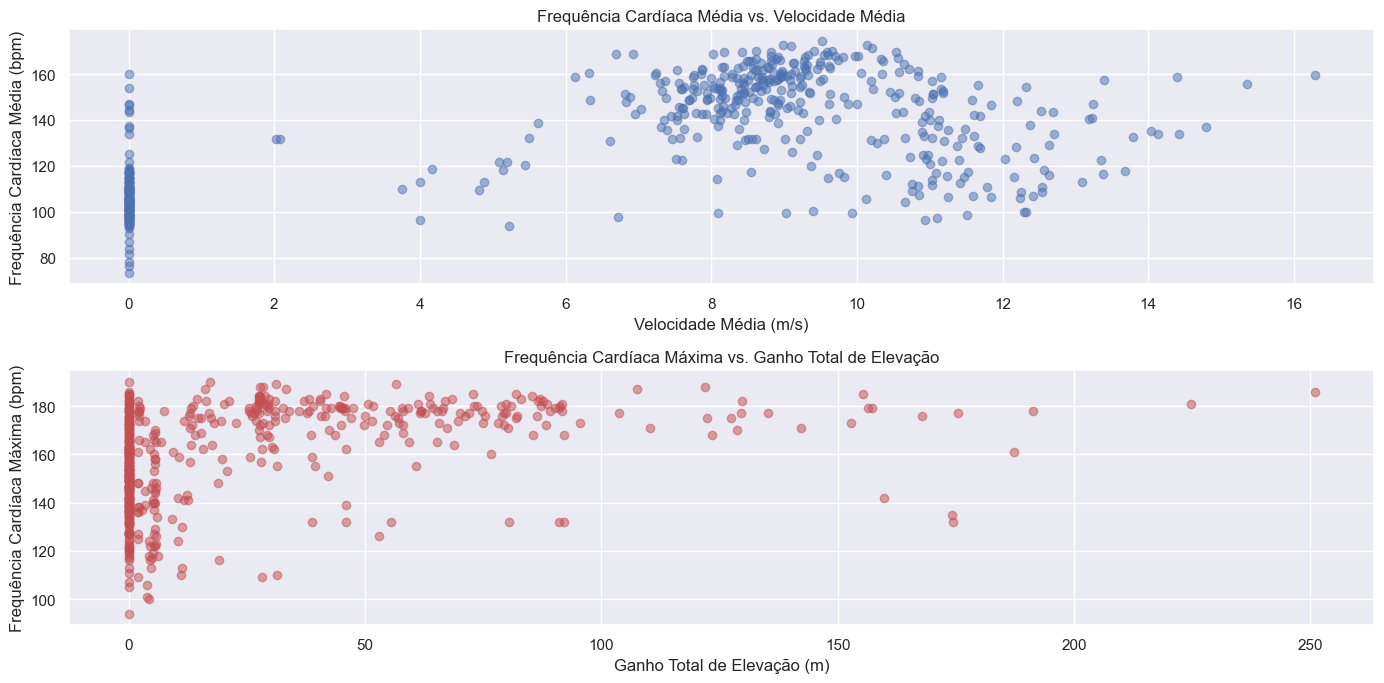

In [168]:
plt.figure(figsize=(14, 7))

# Gráfico para frequência cardíaca média vs. velocidade média
plt.subplot(2, 1, 1)
plt.scatter(df['average_speed'], df['average_heartrate'], alpha=0.5)
plt.title('Frequência Cardíaca Média vs. Velocidade Média')
plt.xlabel('Velocidade Média (m/s)')
plt.ylabel('Frequência Cardíaca Média (bpm)')
plt.grid(True)

# Agora, um gráfico para a relação entre a frequência cardíaca máxima e a elevação máxima
plt.subplot(2, 1, 2)
plt.scatter(df['total_elevation_gain'], df['max_heartrate'], alpha=0.5, color='r')
plt.title('Frequência Cardíaca Máxima vs. Ganho Total de Elevação')
plt.xlabel('Ganho Total de Elevação (m)')
plt.ylabel('Frequência Cardíaca Máxima (bpm)')
plt.grid(True)

plt.tight_layout()
plt.show()

O primeiro gráfico mostra a relação entre a velocidade média e a frequência cardíaca média. Se houver uma tendência de aumento na frequência cardíaca com o aumento da velocidade, isso pode indicar que sua condição cardiovascular está sendo desafiada à medida que você tenta manter ou aumentar sua velocidade.
O segundo gráfico mostra a relação entre o ganho total de elevação e a frequência cardíaca máxima. Um aumento na frequência cardíaca com o aumento da elevação pode indicar um maior esforço cardiovascular em subidas ou terrenos acidentados.